/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


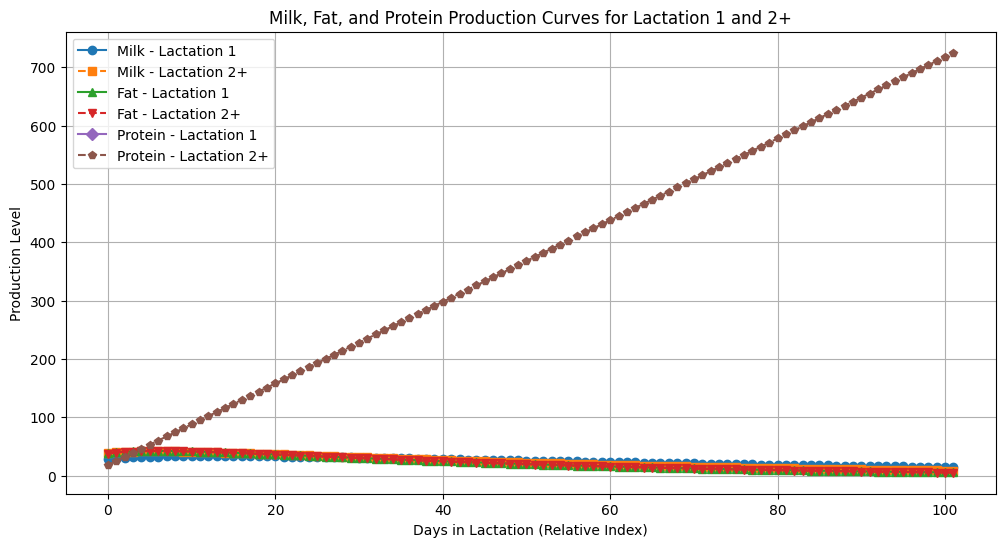

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Dairy_Modeling_Data.xlsx"
xls = pd.ExcelFile(file_path)

# Load the relevant sheet
df = pd.read_excel(xls, sheet_name='dairyplan25')

# Extract relevant rows (17 to 120, adjusting for zero-based indexing)
df_sliced = df.iloc[17:121].reset_index(drop=True)

# Extract relevant columns based on approximate positions
milk_columns = [47, 48]  # Milk for lactation 1 and 2+
fat_columns = [53, 54]   # Fat for lactation 1 and 2+
protein_columns = [59, 60]  # Protein for lactation 1 and 2+

df_production = df_sliced.iloc[:, milk_columns + fat_columns + protein_columns]

# Rename columns for clarity
df_production.columns = ['Milk_Lact1', 'Milk_Lact2+', 'Fat_Lact1', 'Fat_Lact2+', 'Protein_Lact1', 'Protein_Lact2+']

# Convert data to numeric values
df_production = df_production.apply(pd.to_numeric, errors='coerce')

# Plot the production curves
plt.figure(figsize=(12, 6))

# Plot Milk Production
plt.plot(df_production.index, df_production['Milk_Lact1'], label="Milk - Lactation 1", linestyle='-', marker='o')
plt.plot(df_production.index, df_production['Milk_Lact2+'], label="Milk - Lactation 2+", linestyle='--', marker='s')

# Plot Fat Production
plt.plot(df_production.index, df_production['Fat_Lact1'], label="Fat - Lactation 1", linestyle='-', marker='^')
plt.plot(df_production.index, df_production['Fat_Lact2+'], label="Fat - Lactation 2+", linestyle='--', marker='v')

# Plot Protein Production
plt.plot(df_production.index, df_production['Protein_Lact1'], label="Protein - Lactation 1", linestyle='-', marker='D')
plt.plot(df_production.index, df_production['Protein_Lact2+'], label="Protein - Lactation 2+", linestyle='--', marker='p')

# Labels and title
plt.xlabel("Days in Lactation (Relative Index)")
plt.ylabel("Production Level")
plt.title("Milk, Fat, and Protein Production Curves for Lactation 1 and 2+")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Laction curves are used to visulize the changes in milk production over time, specifically from birth to the end of the lactation period. These curves typically follow a standard pattern.Factors that affect lactation curves are genetics, nutrition, health, milking frequency, reproductive status, etc. Understand lactation curves is essential for optimizging milk production and ensuring the health of lactating animals.